<a href="https://colab.research.google.com/github/asdevika2001/CODSOFT/blob/main/movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Genre Classification Dataset IMDb**

---



---

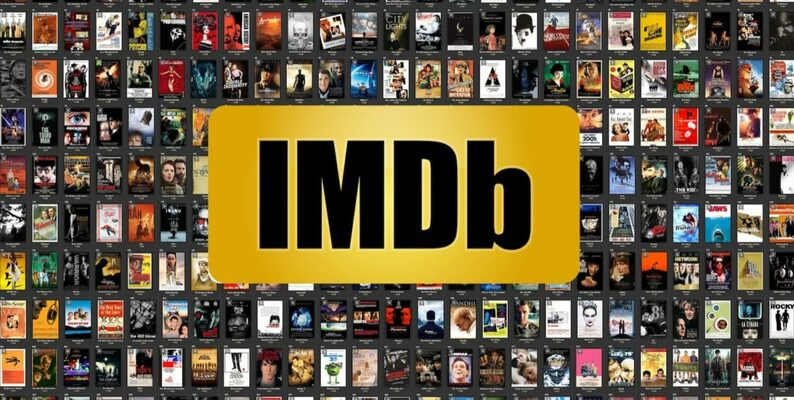

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [45]:
#loading training data
train_data=pd.read_csv('/content/train_data.txt',sep=':::',names=['Title', 'Genre', 'Description'],encoding='ISO-8859-1')

<ipython-input-45-d4cb60217e6f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data=pd.read_csv('/content/train_data.txt',sep=':::',names=['Title', 'Genre', 'Description'],encoding='ISO-8859-1')


In [46]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [48]:
train_data.tail()

,Title,Genre,Description
3174,FrustrÃ© (2013),crime,Fabrice Lombard has neither the means nor the...
3175,The Deafening Silence of a Very Bright Light ...,drama,Photographer Barnard Jacobs is dying. What se...
3176,Whiskey and Apple Pie: A Journey Across Ameri...,documentary,Whiskey and Apple Pie is a thought provoking ...
3177,Not Your Life (2013),documentary,Born to a Nepalese father and an Israeli moth...
3178,Los Siete (2010),western,Seven bandits are threatening the inhabitants...


In [49]:
#shape of training data
train_data.shape

(3178, 3)

In [50]:
#datatypes of training data
train_data.dtypes

Title          object
Genre          object
Description    object
dtype: object

In [51]:
#checking missing values
train_data.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [52]:
#genre count
genere_count=train_data['Genre'].value_counts()
genere_count

 drama           799
 documentary     749
 comedy          441
 short           315
 horror          129
 thriller        112
 action           80
 reality-tv       60
 western          59
 family           47
 adult            43
 adventure        42
 sci-fi           42
 music            37
 romance          32
 animation        27
 biography        25
 crime            23
 sport            19
 fantasy          17
 talk-show        16
 mystery          15
 history          14
 game-show        12
 musical           9
 news              7
 war               7
Name: Genre, dtype: int64

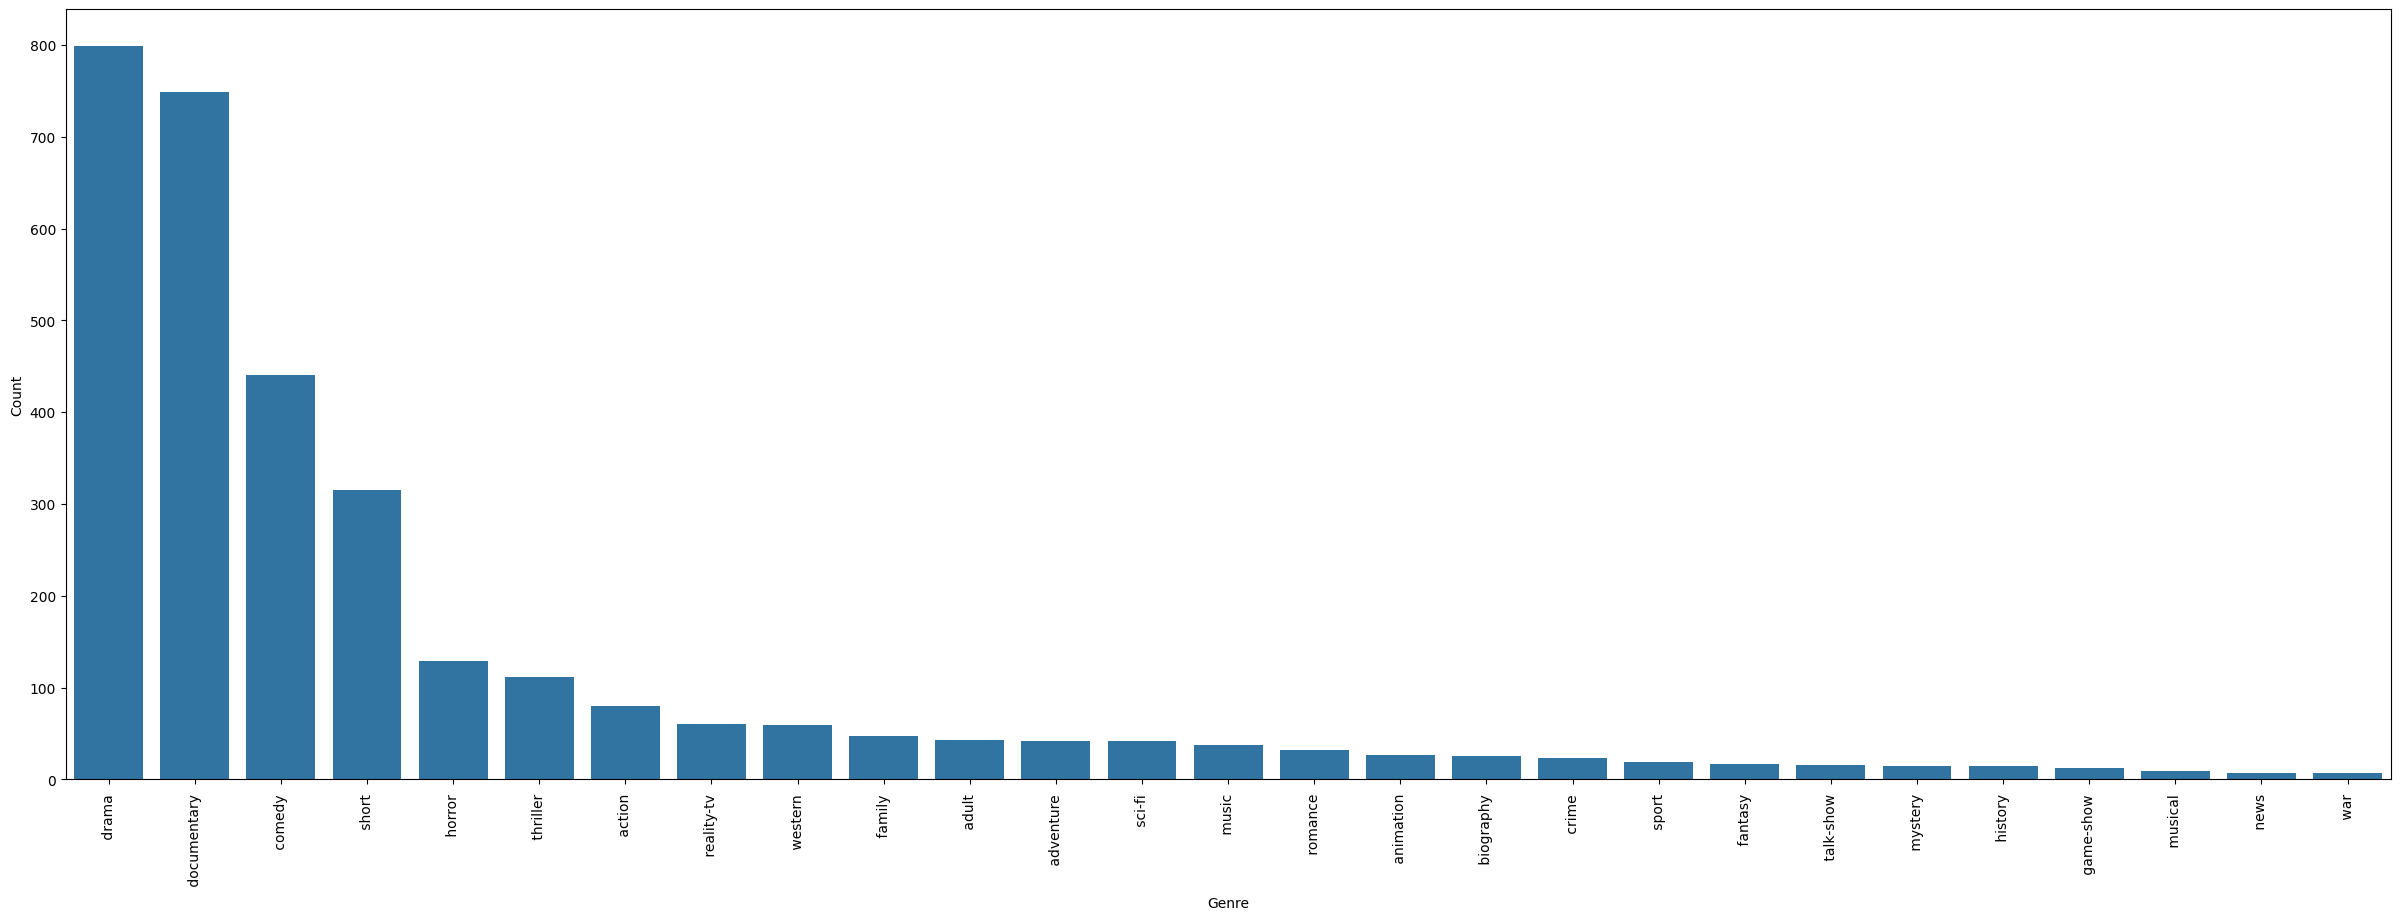

In [53]:
plt.figure(figsize=(30,10))
sns.barplot(x=genere_count.index, y=genere_count)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [54]:
train_data.describe()

,Title,Genre,Description
count,3178,3178,3178
unique,3178,27,3177
top,Oscar et la dame rose (2009),drama,"Held since 2005, Film Spring Open-Air has bee..."
freq,1,799,2


In [55]:
#loading testing data set
test_data=pd.read_csv('/content/test_data.txt',sep=':::',names=['Title', 'Genre', 'Description'],encoding='ISO-8859-1')

<ipython-input-55-c4be966332a2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data=pd.read_csv('/content/test_data.txt',sep=':::',names=['Title', 'Genre', 'Description'],encoding='ISO-8859-1')


In [56]:
test_data.head()

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [57]:
test_data.tail()

,Title,Genre,Description
4904,4905,Composer Alive: Eastern Expressions (2007),Composer Alive: Eastern Expressions explores ...
4905,4906,At Meydani Hippodrome (2011),This 70 minutes documentary tells 10 differen...
4906,4907,Taking the Hill (2006),An intensely honest and hope-filled documenta...
4907,4908,Dreaming for You (2009),"Adam, a lonely young actor living in New York..."
4908,4909,Rocket Rain (2013),"A video artist working on his latest project,..."


In [58]:
test_data.shape

(4909, 3)

In [59]:
test_data.dtypes

Title           int64
Genre          object
Description    object
dtype: object

In [60]:
#checking missing values
train_data.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

Text Cleaning

In [61]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [62]:
stop_words = set(stopwords.words('english')) # stop words
def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+','',text)                       # [1] remove mentions
    text = re.sub(r'http\S+', '', text)                  # [2] remove urls
    text = re.sub(r'[\w\.-]+@[\w\.-]+',"",text)          # [3] remove emails
    text = re.sub(r"[^a-zA-Z+']", ' ', text)             # [4] keep only english chars / remove numbers
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # [5] remove single chars
    text = re.sub(r'pic.\S+', '',text)
    text = re.sub(r'#', "", text)                        # [7] remove hashtags
    text = re.sub(r"_", "  ", text)                      # [8] remove hashtags
    text = re.sub('\n'," . ",text)                       # [9] remove new lines
    text = re.sub('\[[^]]*\]','',text)                   # [10] remove square prackets
    text = "".join([char for char in text if char not in string.punctuation]) # [11] remove punctuations
    text= re.sub("\s[\s]+", " ",text).strip()            # [12] remove repeated/leading/trailing spaces
    tokens = word_tokenize(text)                         # [13] Tokenize
    text = " ".join([word for word in tokens if word not in stop_words and len(word) > 2]) # [14] remove stop words
    return text

In [64]:
train_data['description_cleaned'] = train_data['Description'].apply(clean_data)
test_data['description_cleaned'] = test_data['Description'].apply(clean_data)

In [65]:
#stemming
from nltk.stem import PorterStemmer, WordNetLemmatizer
st = PorterStemmer()
train_data['description_cleaned'] = train_data['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))
test_data['description_cleaned'] = test_data['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [66]:
train_data.head()

,Title,Genre,Description,description_cleaned
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...


Get Top Bigrams

In [67]:
from sklearn.feature_extraction.text import CountVectorizer as CV
def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

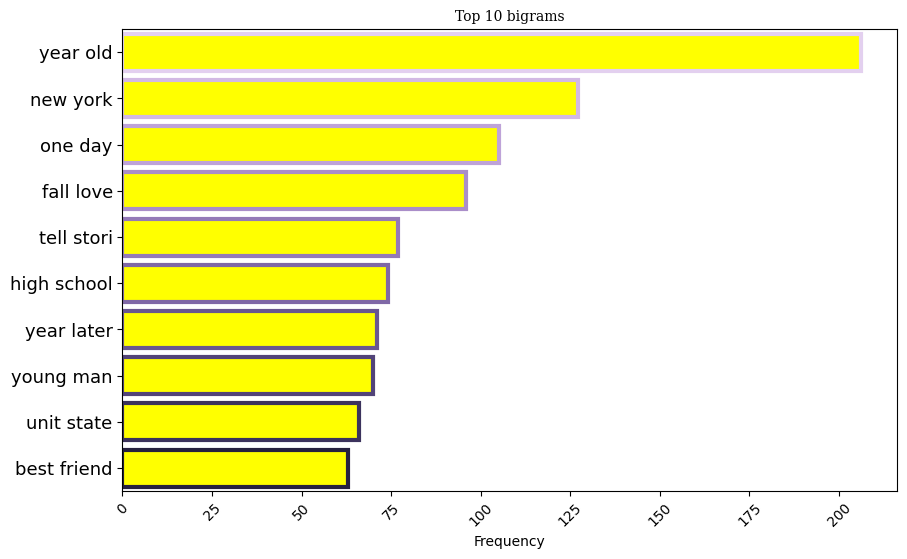

In [68]:
common_words = get_top_n_bigram(train_data['description_cleaned'], 10)
common_words_df = pd.DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='freq', y='word', data=common_words_df,facecolor='yellow',linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",10))

plt.title("Top 10 bigrams",font='Serif')
plt.xlabel("Frequency", fontsize=10)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("");

Label Ecoding of target variable

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['genre'] = le.fit_transform(train_data['Genre'].values)

# keep only relevent columns
train_df = train_data.loc[:,['description_cleaned', 'Genre']]
test_df = test_data.loc[:,['description_cleaned', 'Title']]
train_df.head(10)

,description_cleaned,Genre
1,listen convers doctor parent year old oscar le...,drama
2,brother sister past incestu relationship curre...,thriller
3,bu empti student field trip museum natur histo...,adult
4,help unemploy father make end meet edith twin ...,drama
5,film titl refer recov bodi ground zero also st...,drama
6,qualiti control consist seri singl take shot f...,documentary
7,tough econom time max joey run idea discov sen...,comedy
8,ron petri keanu reev troubl teen whose life ha...,crime
9,sudden calamit event caus great loss life dama...,reality-tv
10,four high school student embark terrifi journe...,horror


Train-Test Split

In [73]:
from sklearn.model_selection import train_test_split
train_set , val_set , train_label , val_label = train_test_split(train_df['description_cleaned'] , train_data['genre'] , test_size=0.2 , shuffle=True , random_state = 42)

print(f'Split data into train and eval sets')
print(f'TraIn Set\t: {len(train_set)}\nValidation Set\t: {len(val_set)}')

Split data into train and eval sets
TraIn Set	: 2542
Validation Set	: 636


Feature Extraction

In [74]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

Naive Bayes

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(train_set_tfidf, train_label)
y_pred_naive = NB_model.predict(val_set_tfidf)
print(classification_report(val_label, y_pred_naive))
naive_accuracy = accuracy_score(y_pred_naive,val_label)
print('Naive Bayes model accuracy is: {:.2f}%'.format(naive_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.67      0.03      0.05        74
           6       0.00      0.00      0.00         6
           7       0.57      0.86      0.68       160
           8       0.37      0.92      0.52       154
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)
print(classification_report(val_label, predict_LR))
LR_accuracy = accuracy_score(predict_LR,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.37      0.26      0.30        74
           6       0.00      0.00      0.00         6
           7       0.54      0.86      0.66       160
           8       0.41      0.88      0.56       154
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine

In [77]:
# Train a SVC classifier
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

print(classification_report(val_label, predict))
svm_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.33      0.13      0.19        15
           1       0.00      0.00      0.00        11
           2       0.33      0.12      0.18         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.39      0.47      0.43        74
           6       0.00      0.00      0.00         6
           7       0.57      0.79      0.66       160
           8       0.48      0.75      0.58       154
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         3
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       0.55      0.26      0.35        23
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
columns=['LogisticRegression', 'MultinomialNB','SVC']
accuracy= [LR_accuracy, naive_accuracy, svm_accuracy]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.459119
1,MultinomialNB,0.443396
2,SVC,0.490566


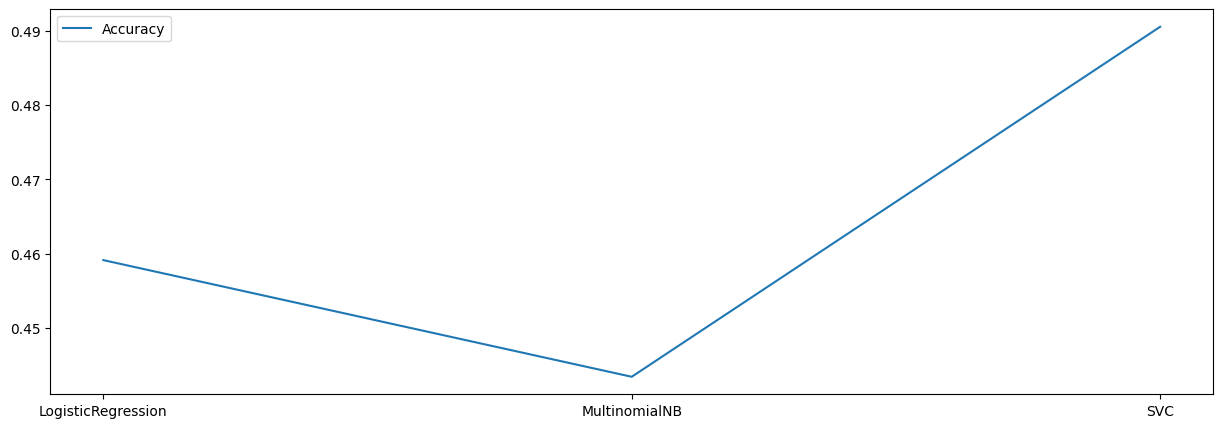

In [79]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy")
plt.legend()
plt.show()